In [34]:
import numpy as np

In [35]:
import pandas as pd

In [36]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [37]:
dataset = pd.read_csv('../data/archive/train.csv')
dataset.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [38]:
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [40]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [42]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [44]:
import keras

In [45]:
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 900us/step - loss: 1.5425 - accuracy: 0.2200
Epoch 2/100
29/29 [==============================] - 0s 832us/step - loss: 1.4414 - accuracy: 0.2533
Epoch 3/100
29/29 [==============================] - 0s 803us/step - loss: 1.3935 - accuracy: 0.2872
Epoch 4/100
29/29 [==============================] - 0s 787us/step - loss: 1.3568 - accuracy: 0.3256
Epoch 5/100
29/29 [==============================] - 0s 792us/step - loss: 1.3223 - accuracy: 0.3633
Epoch 6/100
29/29 [==============================] - 0s 746us/step - loss: 1.2825 - accuracy: 0.4039
Epoch 7/100
29/29 [==============================] - 0s 743us/step - loss: 1.2351 - accuracy: 0.4400
Epoch 8/100
29/29 [==============================] - 0s 741us/step - loss: 1.1754 - accuracy: 0.4900
Epoch 9/100
29/29 [==============================] - 0s 743us/step - loss: 1.1031 - accuracy: 0.5283
Epoch 10/100
29/29 [==============================] - 0s 724us/step - loss: 1.0189 - accura

In [48]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 867us/step


In [49]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 91.5


In [50]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9911 - val_loss: 0.2045 - val_accuracy: 0.9150
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9917 - val_loss: 0.2030 - val_accuracy: 0.9150
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9906 - val_loss: 0.2105 - val_accuracy: 0.9150
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9917 - val_loss: 0.2075 - val_accuracy: 0.9150
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9928 - val_loss: 0.2091 - val_accuracy: 0.9150
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9917 - val_loss: 0.2092 - val_accuracy: 0.9150
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9928 - val_loss: 0.2104 - val_accuracy: 0.9150
Epoch 8/100
2

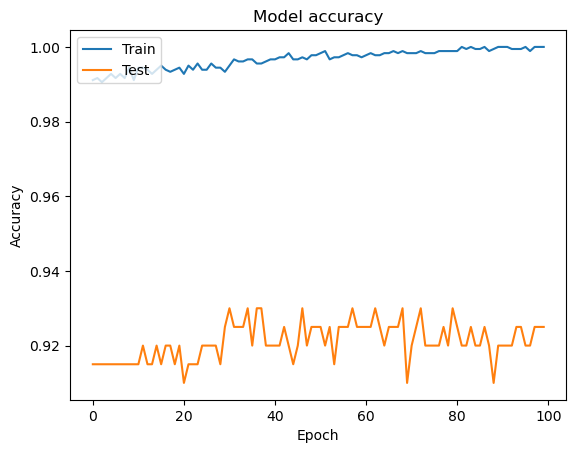

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

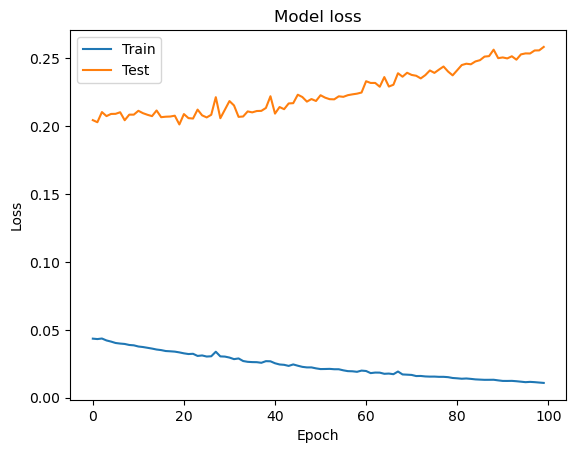

In [52]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [53]:
data = pd.read_csv('../data/table_1.csv', sep = ';')

/var/folders/nn/1kbnq3455vv8xm9r3dx6ybx40000gn/T/ipykernel_98464/3281808201.py:1: DtypeWarning: Columns (146,147,155,156,173,174,182,183,191,192,200,201,209,210,218,219,227,228,236,237,362,363,371,372,389,390,398,399,407,408,416,417,425,426,434,435,443,444,452,453,468,469,476,477,492,493,500,501,508,509,516,517,524,525,532,533,540,541,548,549,564,565,572,573,588,589,596,597,604,605,612,613,620,621,628,629,636,637,644,645,876,877,878,881,889,892,893,894,1357) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/table_1.csv', sep = ';')


In [54]:
data

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),SMILES,Norm_Act,ABC,ABCGG,nAcid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,57260153,2202,Active,8,30.78,O=C1c2c(O)cccc2Cc2cccc(O)c21,0.385246,13.520558,11.120921,0,...,0,0,0,0,0,0,0,0,0,0
1,50085845,2215,Active,9,33.24,CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3,0.389821,16.268104,12.543031,0,...,0,0,0,0,0,0,0,0,0,0
2,57265471,2259,Active,20,75.53,O=C(O)C1=CC(=C(c2ccc(O)c(C(=O)O)c2)c2ccc(O)c(C...,0.468462,23.955071,19.821093,3,...,0,0,0,0,0,0,0,0,0,0
3,855829,2794,Active,21,78.00,CC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3nc-2cc1Nc1...,0.473055,26.357869,19.029926,0,...,0,0,0,0,0,0,0,0,0,0
4,26657972,2866,Active,10,36.96,COC(=O)C1C(O)CCC2CN3CCc4c([nH]c5ccccc45)C3CC21,0.396738,21.068022,15.865154,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49645508,5311,Inactive,0,2.67,O=C(CCCCCCC(=O)Nc1ccccc1)NO,0.332974,13.653808,11.360579,0,...,0,0,0,0,0,0,0,0,0,0
996,855781,5315,Inactive,0,3.17,O=C(O)CCC(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,0.333904,17.554960,14.610439,1,...,0,1,0,0,0,1,0,0,0,0
997,855720,5319,Inactive,1,4.23,Nc1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1,0.335875,14.576703,12.442615,0,...,0,1,0,0,0,0,0,0,0,0
998,56422206,5320,Inactive,1,5.07,CC(=O)NS(=O)(=O)c1ccc(N)cc1,0.337437,10.483892,9.735797,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
data['PUBCHEM_ACTIVITY_OUTCOME'] = data['PUBCHEM_ACTIVITY_OUTCOME'].replace({'Active': 1, 'Inactive':0})

In [56]:
data

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),SMILES,Norm_Act,ABC,ABCGG,nAcid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,57260153,2202,1,8,30.78,O=C1c2c(O)cccc2Cc2cccc(O)c21,0.385246,13.520558,11.120921,0,...,0,0,0,0,0,0,0,0,0,0
1,50085845,2215,1,9,33.24,CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3,0.389821,16.268104,12.543031,0,...,0,0,0,0,0,0,0,0,0,0
2,57265471,2259,1,20,75.53,O=C(O)C1=CC(=C(c2ccc(O)c(C(=O)O)c2)c2ccc(O)c(C...,0.468462,23.955071,19.821093,3,...,0,0,0,0,0,0,0,0,0,0
3,855829,2794,1,21,78.00,CC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3nc-2cc1Nc1...,0.473055,26.357869,19.029926,0,...,0,0,0,0,0,0,0,0,0,0
4,26657972,2866,1,10,36.96,COC(=O)C1C(O)CCC2CN3CCc4c([nH]c5ccccc45)C3CC21,0.396738,21.068022,15.865154,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49645508,5311,0,0,2.67,O=C(CCCCCCC(=O)Nc1ccccc1)NO,0.332974,13.653808,11.360579,0,...,0,0,0,0,0,0,0,0,0,0
996,855781,5315,0,0,3.17,O=C(O)CCC(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,0.333904,17.554960,14.610439,1,...,0,1,0,0,0,1,0,0,0,0
997,855720,5319,0,1,4.23,Nc1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1,0.335875,14.576703,12.442615,0,...,0,1,0,0,0,0,0,0,0,0
998,56422206,5320,0,1,5.07,CC(=O)NS(=O)(=O)c1ccc(N)cc1,0.337437,10.483892,9.735797,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
X = data.iloc[:,7:]

In [58]:
y = data.iloc[:,2:3]

In [59]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()
model.add(Dense(64, input_shape=(1154,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

numeric_columns = X.select_dtypes(include=[int, float])

In [62]:
numeric_columns = X.select_dtypes(include=[int, float])

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_columns)

In [64]:
model.fit(X_scaled, y, epochs=100, batch_size=10)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5460
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5000
Epoch 11/100
100/10

In [65]:
_, accuracy = model.evaluate(numeric_columns, y)
print('Accuracy: %.2f' % (accuracy*100))

32/32 [==============================] - 0s 827us/step - loss: nan - accuracy: 0.5000
Accuracy: 50.00


In [66]:
data

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),SMILES,Norm_Act,ABC,ABCGG,nAcid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,57260153,2202,1,8,30.78,O=C1c2c(O)cccc2Cc2cccc(O)c21,0.385246,13.520558,11.120921,0,...,0,0,0,0,0,0,0,0,0,0
1,50085845,2215,1,9,33.24,CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3,0.389821,16.268104,12.543031,0,...,0,0,0,0,0,0,0,0,0,0
2,57265471,2259,1,20,75.53,O=C(O)C1=CC(=C(c2ccc(O)c(C(=O)O)c2)c2ccc(O)c(C...,0.468462,23.955071,19.821093,3,...,0,0,0,0,0,0,0,0,0,0
3,855829,2794,1,21,78.00,CC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3nc-2cc1Nc1...,0.473055,26.357869,19.029926,0,...,0,0,0,0,0,0,0,0,0,0
4,26657972,2866,1,10,36.96,COC(=O)C1C(O)CCC2CN3CCc4c([nH]c5ccccc45)C3CC21,0.396738,21.068022,15.865154,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,49645508,5311,0,0,2.67,O=C(CCCCCCC(=O)Nc1ccccc1)NO,0.332974,13.653808,11.360579,0,...,0,0,0,0,0,0,0,0,0,0
996,855781,5315,0,0,3.17,O=C(O)CCC(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,0.333904,17.554960,14.610439,1,...,0,1,0,0,0,1,0,0,0,0
997,855720,5319,0,1,4.23,Nc1ccc(S(=O)(=O)NC(=O)c2ccccc2)cc1,0.335875,14.576703,12.442615,0,...,0,1,0,0,0,0,0,0,0,0
998,56422206,5320,0,1,5.07,CC(=O)NS(=O)(=O)c1ccc(N)cc1,0.337437,10.483892,9.735797,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
shuffled_df = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [68]:
train, test = train_test_split(shuffled_df, test_size=0.3, random_state=42)

In [69]:
train

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),SMILES,Norm_Act,ABC,ABCGG,nAcid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
541,858000,659347,1,23,86.58,N#Cc1c(N)sc(=S)c2c1CCCCC2,0.489010,11.370728,10.247163,0,...,0,0,0,0,0,0,0,0,0,0
440,850756,653295,1,8,30.33,O=C1C2C3C=CC(C3)C2C(=O)N1CNc1ccc(O)cc1,0.384409,17.015651,14.245781,0,...,0,0,0,0,0,0,0,0,0,0
482,26666677,4140,1,12,46.65,CCC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.414758,19.734689,15.792428,0,...,0,0,0,0,0,0,0,0,0,0
422,22403861,807677,1,10,37.94,COC(=O)c1ccc(NC(=O)CSc2ccccc2)cc1,0.398561,15.734689,12.519075,0,...,1,0,0,0,0,0,0,0,0,0
778,856881,658239,1,14,53.67,COc1cc([C@@H]2[C@H]3CN(C)CC=C3C(C#N)=C(N)C2(C#...,0.427812,22.439897,19.281083,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,47193723,978,0,0,-1.03,Nc1ccc(C(=O)O)cc1,0.326093,7.358797,6.909742,1,...,0,0,0,0,0,0,0,0,0,0
270,49665230,819865,1,15,57.15,O=C1c2cccc3c([N+](=O)[O-])ccc(c23)C(=O)N1O,0.434283,15.032230,12.529663,0,...,0,0,0,0,0,0,0,0,0,0
860,4245397,677487,1,59,216.66,O=C1CCN2C=Nc3cccc4ccc1c2c34,0.730902,14.008885,10.537147,0,...,0,0,0,0,0,0,0,0,0,0
435,855767,4534,1,8,31.03,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,0.385711,16.798474,13.922766,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
test

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),SMILES,Norm_Act,ABC,ABCGG,nAcid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
521,49681799,2176,0,1,5.22,CCOC(=O)OC(C)OC1=C(C(=O)Nc2ccccn2)N(C)S(=O)(=O...,0.337716,23.764501,19.633944,0,...,0,1,0,0,0,0,0,0,0,0
737,49644081,563436,1,35,129.02,ClCc1nc2ccccc2n1Cc1ccccc1,0.567930,14.020815,11.795655,0,...,0,0,0,0,0,0,0,0,0,0
740,855565,3339,0,2,10.12,CC(C)OC(=O)C(C)(C)Oc1ccc(C(=O)c2ccc(Cl)cc2)cc1,0.346828,19.107073,15.476962,0,...,0,0,0,0,0,0,0,0,0,0
660,49679511,622563,1,39,144.10,CN1c2ccc(C=O)c3c(C=O)ccc(c23)N(C)C1(C)C,0.595972,16.393773,13.915137,0,...,0,0,0,0,0,0,0,0,0,0
411,49681726,4614,0,0,-0.61,O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1,0.326874,17.068022,13.889286,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,49825822,460,0,0,0.83,COc1ccccc1O,0.329552,6.432911,6.255590,0,...,0,0,0,0,0,0,0,0,0,0
935,860796,662071,1,8,31.34,COc1ccc(C2NC3=C(CCC3)C3(C#N)C(OC)(OC)N=C(N)C23...,0.386288,22.281629,19.948700,0,...,0,0,0,0,0,0,0,0,0,0
428,24819326,2002,0,0,-4.95,CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O,0.318804,13.751268,12.393134,1,...,0,0,0,0,0,0,0,0,0,0
7,57264281,289,0,7,28.56,Oc1ccccc1O,0.381118,5.835194,5.606207,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
train.PUBCHEM_ACTIVITY_OUTCOME.value_counts()

PUBCHEM_ACTIVITY_OUTCOME
0    356
1    344
Name: count, dtype: int64

In [72]:
test.PUBCHEM_ACTIVITY_OUTCOME.value_counts()

PUBCHEM_ACTIVITY_OUTCOME
1    156
0    144
Name: count, dtype: int64

In [73]:
hidden_units=200
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [74]:
model = Sequential()

In [75]:
model.add(Dense(hidden_units, input_shape=(1154,), activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))

model.add(Dense(50, activation=hidden_layer_act))
model.add(Dense(50, activation=hidden_layer_act))


model.add(Dense(1, activation=output_layer_act))

In [76]:
from keras import optimizers

In [77]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])

In [78]:
train_x = train.iloc[:,7:].select_dtypes(include=[float, int])
train_x

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
541,11.370728,10.247163,0,0,6,6,27,15,0,0,...,0,0,0,0,0,0,0,0,0,0
440,17.015651,14.245781,0,0,6,6,37,21,0,2,...,0,0,0,0,0,0,0,0,0,0
482,19.734689,15.792428,0,1,9,10,50,25,0,0,...,0,0,0,0,0,0,0,0,0,0
422,15.734689,12.519075,0,0,12,12,36,21,0,0,...,1,0,0,0,0,0,0,0,0,0
778,22.439897,19.281083,0,1,6,6,48,29,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7.358797,6.909742,1,0,6,6,17,10,0,0,...,0,0,0,0,0,0,0,0,0,0
270,15.032230,12.529663,0,0,10,11,25,19,0,0,...,0,0,0,0,0,0,0,0,0,0
860,14.008885,10.537147,0,2,10,11,27,17,0,0,...,0,0,0,0,0,0,0,0,0,0
435,16.798474,13.922766,0,0,12,12,44,22,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
train_y = train.iloc[:,2:3]
train_y

,PUBCHEM_ACTIVITY_OUTCOME
541,1
440,1
482,1
422,1
778,1
...,...
106,0
270,1
860,1
435,1


In [80]:
model.fit(train_x, train_y, epochs=no_epochs, batch_size=len(train), verbose=2)

Epoch 1/100
1/1 - 0s - loss: nan - acc: 0.6129 - 243ms/epoch - 243ms/step
Epoch 2/100
1/1 - 0s - loss: nan - acc: 0.5086 - 11ms/epoch - 11ms/step
Epoch 3/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 4/100
1/1 - 0s - loss: nan - acc: 0.5086 - 10ms/epoch - 10ms/step
Epoch 5/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 6/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: nan - acc: 0.5086 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 9/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 10/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 12/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 13/100
1/1 - 0s - loss: nan - acc: 0.5086 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss: nan - acc: 0.5086 - 10ms/epoch - 10ms/step
Epo

As we can see, the accuracy is still at 0.5086 and there is no changing that. In other ways, we will have to select the descriptors in order to add more accuracy. How can we do that ? First remove the columns where there are NA and variance = 0 and then we do a correlation matrix. 

In [83]:
shuffled_df

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),SMILES,Norm_Act,ABC,ABCGG,nAcid,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,47193681,403,0,7,25.72,Nc1ccc(O)cc1,0.375837,5.875634,5.525875,0,...,0,0,0,0,0,0,0,0,0,0
1,56422144,2818,0,0,1.66,CN1CCN(C2=c3ccccc3=Nc3ccc(Cl)cc3N2)CC1,0.331096,18.441795,14.003999,0,...,0,0,0,0,0,0,0,0,0,0
2,26664668,2904,0,1,5.87,NS(=O)(=O)c1cc2c(cc1Cl)NC(CC1CCCC1)NS2(=O)=O,0.338924,18.377553,15.344157,0,...,0,2,0,0,0,0,0,0,0,0
3,57264276,2154,0,4,16.39,Nc1nc(N)c2nc(CNc3ccc(C(=O)NC(CCC(=O)O)C(=O)O)c...,0.358487,24.645599,18.074432,2,...,0,0,0,0,0,0,0,0,0,0
4,47203549,727034,1,8,31.67,Cc1ccc(C2Nc3cccc4cccc(c34)N2)cc1,0.386901,16.211085,11.892711,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17411420,387161,1,18,66.73,Cc1cc(=O)nc(-n2[nH]c3c(c2=O)CCCC3)[nH]1,0.452098,14.308545,12.069600,0,...,0,0,0,0,0,0,0,0,0,0
996,24841017,659226,1,48,176.16,CCOC(=O)C(C(=O)OCC)c1cc(Br)c2noc3c2c1C(=O)c1cc...,0.655590,22.579695,18.876756,0,...,0,0,0,0,0,0,0,0,0,0
997,26732642,4038,0,2,7.53,Cc1ccc(Cl)c(Nc2ccccc2C(=O)[O-])c1Cl.[Na+],0.342011,14.486884,12.752422,1,...,0,0,0,0,0,0,0,0,0,0
998,49648946,755477,1,8,30.82,Cc1nn(-c2ccc(Br)cc2)c(=O)c2ccccc12,0.385321,14.975211,12.098211,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
s2 = shuffled_df.dropna(axis=1)

In [85]:
nc_2 = s2.select_dtypes(include=[int, float])

In [86]:
nc_2

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),Norm_Act,ABC,ABCGG,nAcid,nBase,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,47193681,403,0,7,25.72,0.375837,5.875634,5.525875,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56422144,2818,0,0,1.66,0.331096,18.441795,14.003999,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26664668,2904,0,1,5.87,0.338924,18.377553,15.344157,0,0,...,0,2,0,0,0,0,0,0,0,0
3,57264276,2154,0,4,16.39,0.358487,24.645599,18.074432,2,0,...,0,0,0,0,0,0,0,0,0,0
4,47203549,727034,1,8,31.67,0.386901,16.211085,11.892711,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17411420,387161,1,18,66.73,0.452098,14.308545,12.069600,0,0,...,0,0,0,0,0,0,0,0,0,0
996,24841017,659226,1,48,176.16,0.655590,22.579695,18.876756,0,0,...,0,0,0,0,0,0,0,0,0,0
997,26732642,4038,0,2,7.53,0.342011,14.486884,12.752422,1,1,...,0,0,0,0,0,0,0,0,0,0
998,49648946,755477,1,8,30.82,0.385321,14.975211,12.098211,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
desc_2 = nc_2.iloc[:,5:]
desc_2

,Norm_Act,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.375837,5.875634,5.525875,0,0,6,6,15,8,0,...,0,0,0,0,0,0,0,0,0,0
1,0.331096,18.441795,14.003999,0,1,12,12,42,23,0,...,0,0,0,0,0,0,0,0,0,0
2,0.338924,18.377553,15.344157,0,0,6,6,41,23,0,...,0,2,0,0,0,0,0,0,0,0
3,0.358487,24.645599,18.074432,2,0,16,17,52,32,0,...,0,0,0,0,0,0,0,0,0,0
4,0.386901,16.211085,11.892711,0,0,16,17,36,20,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.452098,14.308545,12.069600,0,0,11,11,32,18,0,...,0,0,0,0,0,0,0,0,0,0
996,0.655590,22.579695,18.876756,0,0,15,16,45,29,0,...,0,0,0,0,0,0,0,0,0,0
997,0.342011,14.486884,12.752422,1,1,12,12,30,20,0,...,0,0,0,0,0,0,0,0,0,0
998,0.385321,14.975211,12.098211,0,0,16,17,30,19,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
desc_good = desc_2.loc[:,desc_2.std() > 0]

In [96]:
info = nc_2.iloc[:,0:5]
info

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM)
0,47193681,403,0,7,25.72
1,56422144,2818,0,0,1.66
2,26664668,2904,0,1,5.87
3,57264276,2154,0,4,16.39
4,47203549,727034,1,8,31.67
...,...,...,...,...,...
995,17411420,387161,1,18,66.73
996,24841017,659226,1,48,176.16
997,26732642,4038,0,2,7.53
998,49648946,755477,1,8,30.82


In [98]:
gg = pd.concat([info, desc_good], axis=1)
gg

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),Norm_Act,ABC,ABCGG,nAcid,nBase,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_urea
0,47193681,403,0,7,25.72,0.375837,5.875634,5.525875,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56422144,2818,0,0,1.66,0.331096,18.441795,14.003999,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26664668,2904,0,1,5.87,0.338924,18.377553,15.344157,0,0,...,0,0,0,2,0,0,0,0,0,0
3,57264276,2154,0,4,16.39,0.358487,24.645599,18.074432,2,0,...,0,0,0,0,0,0,0,0,0,0
4,47203549,727034,1,8,31.67,0.386901,16.211085,11.892711,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17411420,387161,1,18,66.73,0.452098,14.308545,12.069600,0,0,...,0,0,0,0,0,0,0,0,0,0
996,24841017,659226,1,48,176.16,0.655590,22.579695,18.876756,0,0,...,0,0,0,0,0,0,0,0,0,0
997,26732642,4038,0,2,7.53,0.342011,14.486884,12.752422,1,1,...,0,0,0,0,0,0,0,0,0,0
998,49648946,755477,1,8,30.82,0.385321,14.975211,12.098211,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
train, test = train_test_split(gg, test_size=0.3, random_state=42)

In [100]:
train

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),Norm_Act,ABC,ABCGG,nAcid,nBase,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_urea
541,858000,659347,1,23,86.58,0.489010,11.370728,10.247163,0,0,...,0,0,0,0,0,0,0,0,0,0
440,850756,653295,1,8,30.33,0.384409,17.015651,14.245781,0,0,...,0,0,0,0,0,0,0,0,0,0
482,26666677,4140,1,12,46.65,0.414758,19.734689,15.792428,0,1,...,0,0,0,0,0,0,0,0,0,0
422,22403861,807677,1,10,37.94,0.398561,15.734689,12.519075,0,0,...,0,0,1,0,0,0,0,0,0,0
778,856881,658239,1,14,53.67,0.427812,22.439897,19.281083,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,47193723,978,0,0,-1.03,0.326093,7.358797,6.909742,1,0,...,0,0,0,0,0,0,0,0,0,0
270,49665230,819865,1,15,57.15,0.434283,15.032230,12.529663,0,0,...,0,0,0,0,0,0,0,0,0,0
860,4245397,677487,1,59,216.66,0.730902,14.008885,10.537147,0,2,...,0,0,0,0,0,0,0,0,0,0
435,855767,4534,1,8,31.03,0.385711,16.798474,13.922766,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
test

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Inhibition(10.9uM),Norm_Act,ABC,ABCGG,nAcid,nBase,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_urea
521,49681799,2176,0,1,5.22,0.337716,23.764501,19.633944,0,0,...,0,1,0,1,0,0,0,0,0,0
737,49644081,563436,1,35,129.02,0.567930,14.020815,11.795655,0,0,...,0,0,0,0,0,0,0,0,0,0
740,855565,3339,0,2,10.12,0.346828,19.107073,15.476962,0,0,...,0,0,0,0,0,0,0,0,0,0
660,49679511,622563,1,39,144.10,0.595972,16.393773,13.915137,0,0,...,0,0,0,0,0,0,0,0,0,0
411,49681726,4614,0,0,-0.61,0.326874,17.068022,13.889286,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,49825822,460,0,0,0.83,0.329552,6.432911,6.255590,0,0,...,0,0,0,0,0,0,0,0,0,0
935,860796,662071,1,8,31.34,0.386288,22.281629,19.948700,0,2,...,0,0,0,0,0,0,0,0,0,0
428,24819326,2002,0,0,-4.95,0.318804,13.751268,12.393134,1,0,...,0,0,0,0,0,0,0,0,0,0
7,57264281,289,0,7,28.56,0.381118,5.835194,5.606207,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
train.PUBCHEM_ACTIVITY_OUTCOME.value_counts()

PUBCHEM_ACTIVITY_OUTCOME
0    356
1    344
Name: count, dtype: int64

In [103]:
test.PUBCHEM_ACTIVITY_OUTCOME.value_counts()

PUBCHEM_ACTIVITY_OUTCOME
1    156
0    144
Name: count, dtype: int64

In [177]:
hidden_units=200
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=200


model = Sequential()


model.add(Dense(hidden_units, input_shape=(None,700,985), activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))

model.add(Dense(50, activation=hidden_layer_act))
model.add(Dense(50, activation=hidden_layer_act))

model.add(Dense(1, activation=output_layer_act))


sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])

In [178]:
train_x = train.iloc[:,5:]
train_x

,Norm_Act,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_urea
541,0.489010,11.370728,10.247163,0,0,6,6,27,15,0,...,0,0,0,0,0,0,0,0,0,0
440,0.384409,17.015651,14.245781,0,0,6,6,37,21,0,...,0,0,0,0,0,0,0,0,0,0
482,0.414758,19.734689,15.792428,0,1,9,10,50,25,0,...,0,0,0,0,0,0,0,0,0,0
422,0.398561,15.734689,12.519075,0,0,12,12,36,21,0,...,0,0,1,0,0,0,0,0,0,0
778,0.427812,22.439897,19.281083,0,1,6,6,48,29,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.326093,7.358797,6.909742,1,0,6,6,17,10,0,...,0,0,0,0,0,0,0,0,0,0
270,0.434283,15.032230,12.529663,0,0,10,11,25,19,0,...,0,0,0,0,0,0,0,0,0,0
860,0.730902,14.008885,10.537147,0,2,10,11,27,17,0,...,0,0,0,0,0,0,0,0,0,0
435,0.385711,16.798474,13.922766,0,0,12,12,44,22,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
train_y = train.PUBCHEM_ACTIVITY_OUTCOME
train_y

541    1
440    1
482    1
422    1
778    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: PUBCHEM_ACTIVITY_OUTCOME, Length: 700, dtype: int64

In [180]:
model.fit(train_x, train_y, epochs=no_epochs, batch_size=len(train), verbose=2)

Epoch 1/200
1/1 - 0s - loss: 0.8610 - acc: 0.4357 - 230ms/epoch - 230ms/step
Epoch 2/200
1/1 - 0s - loss: 0.8104 - acc: 0.4371 - 9ms/epoch - 9ms/step
Epoch 3/200
1/1 - 0s - loss: 0.7324 - acc: 0.4529 - 10ms/epoch - 10ms/step
Epoch 4/200
1/1 - 0s - loss: 0.6996 - acc: 0.4614 - 10ms/epoch - 10ms/step
Epoch 5/200
1/1 - 0s - loss: 0.6966 - acc: 0.4686 - 9ms/epoch - 9ms/step
Epoch 6/200
1/1 - 0s - loss: 0.6882 - acc: 0.5814 - 9ms/epoch - 9ms/step
Epoch 7/200
1/1 - 0s - loss: 0.6826 - acc: 0.5886 - 10ms/epoch - 10ms/step
Epoch 8/200
1/1 - 0s - loss: 0.6793 - acc: 0.5886 - 9ms/epoch - 9ms/step
Epoch 9/200
1/1 - 0s - loss: 0.6765 - acc: 0.5900 - 10ms/epoch - 10ms/step
Epoch 10/200
1/1 - 0s - loss: 0.6743 - acc: 0.5929 - 10ms/epoch - 10ms/step
Epoch 11/200
1/1 - 0s - loss: 0.6720 - acc: 0.5929 - 9ms/epoch - 9ms/step
Epoch 12/200
1/1 - 0s - loss: 0.6709 - acc: 0.5900 - 10ms/epoch - 10ms/step
Epoch 13/200
1/1 - 0s - loss: 0.6690 - acc: 0.5929 - 9ms/epoch - 9ms/step
Epoch 14/200
1/1 - 0s - loss: 0

In [181]:
model2 = Sequential()
model2.add(Dense(64, input_shape=(None,700,985), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [182]:
model2.fit(train_x, train_y, epochs=100, batch_size=len(train))

Epoch 1/100
1/1 [==============================] - 0s 435ms/step - loss: 2666198391062528.0000 - accuracy: 0.5129
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 44455804928.0000 - accuracy: 0.4543
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 76440510464.0000 - accuracy: 0.4800
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 99810451456.0000 - accuracy: 0.4986
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 117921439744.0000 - accuracy: 0.5071
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 132313382912.0000 - accuracy: 0.5071
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 142702870528.0000 - accuracy: 0.5114
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 151086350336.0000 - accuracy: 0.4971
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 158028922880.0000 - accuracy: 0.4814
Epoch 10/100
1/1 [=======

In [183]:
test_x = test.iloc[:,5:]
pred = model.predict(test_x)

10/10 [==============================] - 0s 1ms/step


In [184]:
pred

array([[0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.53852475],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.53852475],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.14807348],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.37803003],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.5525388 ],
       [0.38495418],
       [0.4865743 ],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.10892183],
       [0.57575786],
       [0.57575786],
       [0.15130238],
       [0.4865743 ],
       [0.57575786],
       [0.57575786],
       [0.57575786],
       [0.134

In [185]:
rounded = [int(round(x[0])) for x in pred]
print(rounded)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]


In [186]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [187]:
Y = list(test['PUBCHEM_ACTIVITY_OUTCOME'].values)

In [188]:
print(confusion_matrix(Y, rounded))

[[ 50  94]
 [ 21 135]]


In [189]:
print(classification_report(Y, rounded))

              precision    recall  f1-score   support

           0       0.70      0.35      0.47       144
           1       0.59      0.87      0.70       156

    accuracy                           0.62       300
   macro avg       0.65      0.61      0.58       300
weighted avg       0.64      0.62      0.59       300



The performances are not that great. We will have to dig further in order to get bettre results. 

In [163]:
right_col = ['AATS0d', 'AATS0i', 'AATS0v', 'AATS1d', 'AATS1dv', 'AATS1i',
       'AATS1v', 'AATS2d', 'AATS2i', 'AATS2v', 'AATSC1dv', 'AATSC2v',
       'ABCGG', 'ATS0dv', 'ATS1Z', 'ATS1dv', 'ATS2Z', 'ATS2dv', 'ATS3Z',
       'ATS3dv', 'ATS4dv', 'ATS5Z', 'ATS5dv', 'ATS6Z', 'ATS6dv', 'ATS7Z',
       'ATS7dv', 'ATS7se', 'ATS8Z', 'ATS8dv', 'ATS8se', 'ATSC0d',
       'ATSC0dv', 'ATSC0i', 'ATSC0v', 'ATSC1d', 'ATSC1dv', 'ATSC1pe',
       'ATSC2Z', 'ATSC2d', 'ATSC2se', 'ATSC2v', 'ATSC3dv', 'ATSC4d',
       'ATSC4pe', 'ATSC4se', 'ATSC5d', 'ATSC6d', 'ATSC6dv', 'ATSC7d',
       'ATSC7dv', 'ATSC8dv', 'BalabanJ', 'BertzCT', 'C1SP1', 'C1SP2',
       'C2SP2', 'C3SP2', 'CIC0', 'EState_VSA1', 'EState_VSA3',
       'EState_VSA4', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8',
       'FilterItLogS', 'GGI2', 'GGI3', 'GGI4', 'GGI5', 'IC2', 'IC3',
       'IC4', 'Kier1', 'MIC2', 'NaaCH', 'NaaaC', 'NaasC', 'NdsCH', 'NsOH',
       'NsssN', 'NtsC', 'PEOE_VSA11', 'PEOE_VSA4', 'PEOE_VSA7',
       'PEOE_VSA8', 'PEOE_VSA9', 'SLogP', 'SMR_VSA1', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA9', 'SRW05', 'SZ', 'SaaO', 'SaaaC', 'SaasC',
       'SdsCH', 'SdssC', 'SlogP_VSA4', 'SlogP_VSA6', 'SlogP_VSA8',
       'SsssN', 'TIC0', 'TIC1', 'TSRW10', 'TpiPC10', 'VAdjMat',
       'VSA_EState4', 'VSA_EState6', 'VSA_EState9', 'Xch-7d', 'Xp-1dv',
       'Xp-2dv', 'Xp-3dv', 'Xp-5dv', 'Xpc-4d', 'Xpc-4dv', 'Xpc-5d',
       'fragCpx', 'n5HRing', 'n5Ring', 'n5aRing', 'n6AHRing', 'n6ARing',
       'n6HRing', 'n6Ring', 'n6aHRing', 'n6aRing', 'nAHRing', 'nARing',
       'nAcid', 'nAromAtom', 'nAtom', 'nBondsKD', 'nBondsM', 'nBondsT',
       'nC', 'nCl', 'nFAHRing', 'nFARing', 'nFHRing', 'nFRing', 'nHBAcc',
       'nHBDon', 'nHRing', 'nN', 'nRing', 'nRot', 'nX', 'naHRing',
       'piPC10', 'piPC3', 'piPC7', 'piPC8', 'piPC9']

In [194]:
hidden_units=200
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100


model3 = Sequential()


model3.add(Dense(hidden_units, input_shape=(None,700,156), activation=hidden_layer_act))
model3.add(Dense(hidden_units, activation=hidden_layer_act))

model3.add(Dense(50, activation=hidden_layer_act))
model3.add(Dense(50, activation=hidden_layer_act))

model3.add(Dense(1, activation=output_layer_act))


sgd=optimizers.SGD(learning_rate=learning_rate)
model3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])

In [191]:
train_x_2 = train[right_col]
train_x_2

,AATS0d,AATS0i,AATS0v,AATS1d,AATS1dv,AATS1i,AATS1v,AATS2d,AATS2i,AATS2v,...,nN,nRing,nRot,nX,naHRing,piPC10,piPC3,piPC7,piPC8,piPC9
541,3.259259,157.440351,248.587914,4.000000,5.428571,142.804742,290.364945,3.540000,146.306153,243.830594,...,2,2,0,0,1,5.279071,4.314149,5.427562,5.404225,5.277636
440,3.675676,161.249354,227.281379,4.575000,7.450000,145.839310,276.620082,4.219178,150.029542,243.177800,...,2,4,3,0,0,5.936546,4.457250,5.461976,5.646992,5.885062
482,3.260000,163.269024,208.203114,4.056604,5.981132,147.368873,258.103856,3.773196,154.305772,219.660957,...,3,4,4,0,1,7.882981,4.811168,6.881259,7.318060,7.561178
422,3.194444,157.705506,242.549732,3.729730,7.135135,142.985984,283.268370,3.372881,148.907396,240.543181,...,1,2,5,0,0,5.298942,4.382027,5.392775,5.447545,5.247024
778,3.729167,162.263980,236.462277,4.568627,8.705882,146.531894,279.112267,4.377778,153.858754,247.093003,...,5,4,2,0,0,7.419662,4.943427,6.701960,7.015769,7.294505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3.117647,162.595688,226.958838,3.588235,8.117647,150.050718,270.940008,3.400000,148.123005,245.807691,...,1,1,1,0,0,0.000000,3.669951,3.840795,0.000000,0.000000
270,4.480000,159.230990,273.491501,5.296296,13.037037,147.798651,311.788162,5.069767,146.371073,303.648341,...,2,3,1,0,0,7.694424,4.795791,6.969644,7.277669,7.651066
860,4.074074,156.749219,257.151600,4.833333,9.033333,142.599381,299.479473,4.557692,148.770284,269.557980,...,2,4,0,0,0,7.961980,4.738389,6.993589,7.419404,7.858386
435,3.000000,161.188452,208.470675,3.577778,5.977778,144.875757,258.912284,3.368421,148.178475,223.229340,...,0,2,5,0,0,5.410529,4.448516,5.182836,5.270432,5.247024


In [192]:
train_y_2 = train_y
train_y_2

541    1
440    1
482    1
422    1
778    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: PUBCHEM_ACTIVITY_OUTCOME, Length: 700, dtype: int64

In [193]:
model3.fit(train_x_2, train_y_2, epochs=no_epochs, batch_size=len(train), verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.7955 - acc: 0.5086 - 233ms/epoch - 233ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7117 - acc: 0.5229 - 6ms/epoch - 6ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6756 - acc: 0.5329 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6527 - acc: 0.6071 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6479 - acc: 0.6129 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6417 - acc: 0.6200 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6395 - acc: 0.6329 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6371 - acc: 0.6500 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6356 - acc: 0.6557 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6325 - acc: 0.6614 - 5ms/epoch - 5ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6303 - acc: 0.6600 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6281 - acc: 0.6614 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6254 - acc: 0.6600 - 5ms/epoch - 5ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6247 - acc:

In [199]:
model4 = Sequential()
model4.add(Dense(64, input_shape=(None,700,156), activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [201]:
model4.fit(train_x_2, train_y_2, epochs=200, batch_size=len(train))

Epoch 1/200
1/1 [==============================] - 0s 6ms/step - loss: 0.3864 - accuracy: 0.8543
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8557
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 0.3748 - accuracy: 0.8614
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.8614
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3661 - accuracy: 0.8686
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3606 - accuracy: 0.8614
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.8686
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8714
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.8743
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.8757
Epoch 11/200
1/1 [===========

In [202]:
test_x_2 = test[right_col]

In [203]:
pred_model_3 = model3.predict(test_x_2)
pred_model_3

10/10 [==============================] - 0s 1ms/step


array([[0.41845134],
       [0.4225515 ],
       [0.32740617],
       [0.38028556],
       [0.3462775 ],
       [0.36649173],
       [0.40246168],
       [0.33565143],
       [0.18304095],
       [0.38413566],
       [0.2969885 ],
       [0.42679977],
       [0.42187434],
       [0.35924584],
       [0.4345473 ],
       [0.34552145],
       [0.34095076],
       [0.38513082],
       [0.5221631 ],
       [0.42947808],
       [0.48884955],
       [0.23450035],
       [0.28405935],
       [0.313971  ],
       [0.35002035],
       [0.30380642],
       [0.34630463],
       [0.38572016],
       [0.46198148],
       [0.33148128],
       [0.35506585],
       [0.28965035],
       [0.435163  ],
       [0.30089864],
       [0.39033848],
       [0.40699595],
       [0.3708393 ],
       [0.3206394 ],
       [0.39585477],
       [0.34430155],
       [0.4090117 ],
       [0.36527804],
       [0.34490654],
       [0.29837492],
       [0.28263485],
       [0.34382403],
       [0.38933447],
       [0.354

In [204]:
rounded = [int(round(x[0])) for x in pred_model_3]
print(rounded)
print(confusion_matrix(Y, rounded))
print(classification_report(Y, rounded))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[143   1]
 [154   2]]
              precision    recall  f1-score   support

           0       0.

In [206]:
pred_model_4 = model4.predict(test_x_2)
pred_model_4

10/10 [==============================] - 0s 683us/step


array([[8.22831498e-05],
       [9.99080062e-01],
       [9.01149631e-01],
       [9.99999821e-01],
       [1.52315721e-01],
       [8.33185196e-01],
       [9.95704710e-01],
       [9.39888597e-01],
       [1.85654148e-11],
       [9.59508061e-01],
       [9.97254014e-01],
       [9.77459988e-11],
       [6.20759733e-04],
       [9.99880075e-01],
       [9.96937156e-01],
       [4.30821953e-03],
       [4.19012358e-04],
       [9.99986231e-01],
       [1.19092297e-02],
       [9.99998271e-01],
       [9.99982536e-01],
       [8.73137534e-01],
       [1.09444126e-01],
       [2.70758063e-01],
       [2.17946142e-01],
       [2.53241183e-03],
       [9.99366879e-01],
       [8.53332698e-01],
       [9.99457419e-01],
       [9.99999404e-01],
       [9.99174893e-01],
       [1.83808133e-01],
       [9.99980211e-01],
       [6.29298627e-01],
       [8.17243695e-01],
       [2.56770104e-01],
       [3.95004897e-11],
       [6.05311573e-01],
       [7.73635447e-01],
       [1.19422389e-10],


In [207]:
rounded = [int(round(x[0])) for x in pred_model_4]
print(rounded)
print(confusion_matrix(Y, rounded))
print(classification_report(Y, rounded))

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[[ 84  60]
 [ 32 124]]
              precision    recall  f1-score   support

           0       0.